![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)

## Lecture 4 Support Notebook

### Table of Contents
<p>
<div class="lev1">
    <a href="#K-armed-Bandit-Problem">
        <span class="toc-item-num">1.&nbsp;&nbsp;</span>
        K-armed Bandit Problem
    </a>
</div>
<div class="lev1">
    <a href="#Ten-armed-Testbed-I"><span class="toc-item-num">2.&nbsp;&nbsp;</span>
        Ten-armed Testbed I
    </a>
</div>
<div class="lev1">
    <a href="#Ten-armed-Testbed-II"><span class="toc-item-num">2.&nbsp;&nbsp;</span>
        Ten-armed Testbed II
    </a>
</div>
<div class="lev1">
    <a href="#Optimistic-Initial-Values"><span class="toc-item-num">3.&nbsp;&nbsp;</span>
        Optimistic Initial Values
    </a>
</div>
<div class="lev1">
    <a href="#Upper-Confidence-Bound-Action-Selection"><span class="toc-item-num">4.&nbsp;&nbsp;</span>
        Upper-Confidence-Bound Action Selection
    </a>
</div>
<div class="lev1">
    <a href="#Gradient-Bandits"><span class="toc-item-num">5.&nbsp;&nbsp;</span>
        Gradient Bandits
    </a>
</div>
<div class="lev1">
    <a href="#Parameter-Study-Graphs"><span class="toc-item-num">6.&nbsp;&nbsp;</span>
        Parameter Study Graphs
    </a>
</div>

# TOP

# K-armed Bandit Problem
This is a simple example of how to build a policy-gradient based agent that can solve the multi-armed bandit problem. For more information, see this [Medium post](https://medium.com/@awjuliani/super-simple-reinforcement-learning-tutorial-part-1-fd544fab149).

In [1]:
import tensorflow as tf
import numpy as np

### The Bandits
+ Here we define our bandits. For this example we are using a four-armed bandit
+ The pullBandit function generates a random number from a normal distribution with a mean of 0. The lower the bandit number, the more likely a positive reward will be returned
+ We want our agent to learn to always choose the bandit that will give that positive reward.

In [2]:
# List out our bandits. Currently bandit 4 (index #3) is set to most often provide a positive reward.
bandits = [0.2,0,-0.2,-5]
num_bandits = len(bandits)
def pullBandit(bandit):
    # Get a random number. Here is why the more negative the number in bandits vector, more chances of reward = 1
    result = np.random.randn(1)
    if result > bandit:
        #return a positive reward.
        return 1
    else:
        #return a negative reward.
        return -1

### The Agent
The code below established our simple neural agent. 
+ It consists of a set of values for each of the bandits. 
+ Each value is an estimate of the value of the return from choosing the bandit. 
+ We use a policy gradient method to update the agent by moving the value for the selected action toward the recieved reward.

In [3]:
tf.reset_default_graph()

# These two lines established the feed-forward part of the network. This does the actual choosing.
weights = tf.Variable(tf.ones([num_bandits]))
chosen_action = tf.argmax(weights,0)

# The next six lines establish the training proceedure. We feed the reward and chosen action into the network
# to compute the loss, and use it to update the network.
reward_holder = tf.placeholder(shape=[1],dtype=tf.float32)
action_holder = tf.placeholder(shape=[1],dtype=tf.int32)
responsible_weight = tf.slice(weights,action_holder,[1])
loss = -(tf.log(responsible_weight)*reward_holder)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
update = optimizer.minimize(loss)

### Training the Agent

+ We will train our agent by taking actions in our environment, and recieving rewards. 
+ Using the rewards and actions, we can know how to properly update our network in order to more often choose actions that will yield the highest rewards over time.

In [4]:
total_episodes = 1000 # Set total number of episodes to train agent on.
total_reward = np.zeros(num_bandits) # Set scoreboard for bandits to 0.
e = 0.1 # Set the chance of taking a random action.

init = tf.initialize_all_variables()

# Launch the tensorflow graph
with tf.Session() as sess:
    sess.run(init)
    i = 0
    while i < total_episodes:
        
        # Choose either a random action or one from our network.
        ##########################################################
        # This is a balance between exploration and exploitation using epsilon-greedy
        ##########################################################
        if np.random.rand(1) < e:
            action = np.random.randint(num_bandits)
        else:
            action = sess.run(chosen_action)
        
        reward = pullBandit(bandits[action]) # Get our reward from picking one of the bandits.
        
        # Update the network.
        _, ww = sess.run([update, weights], feed_dict={reward_holder:[reward],action_holder:[action]})
#         _,resp,ww = sess.run([update,responsible_weight,weights], feed_dict={reward_holder:[reward],action_holder:[action]})
        
        # Update our running tally of scores.
        total_reward[action] += reward
        if i % 50 == 0:
            print ("Running reward for the " + str(num_bandits) + " bandits: " + str(total_reward))
        i+=1
print ("The agent thinks bandit " + str(np.argmax(ww)+1) + " is the most promising....")
if np.argmax(ww) == np.argmax(-np.array(bandits)):
    print ("...and it was right!")
else:
    print ("...and it was wrong!")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Running reward for the 4 bandits: [-1.  0.  0.  0.]
Running reward for the 4 bandits: [ 0.  0. -1. 40.]
Running reward for the 4 bandits: [ 0.  1.  0. 86.]
Running reward for the 4 bandits: [ -2.   0.  -2. 131.]
Running reward for the 4 bandits: [ -1.   0.   0. 174.]
Running reward for the 4 bandits: [  0.   0.  -1. 220.]
Running reward for the 4 bandits: [ -1.  -1.   1. 266.]
Running reward for the 4 bandits: [ -2.  -2.  -1. 312.]
Running reward for the 4 bandits: [ -2.  -5.  -2. 358.]
Running reward for the 4 bandits: [ -1.  -5.  -2. 407.]
Running reward for the 4 bandits: [ -3.  -5.  -2. 455.]
Running reward for the 4 bandits: [ -1.  -5.  -1. 498.]
Running reward for the 4 bandits: [ -1.  -6.  -1. 545.]
Running reward for the 4 bandits: [ -2.  -2.  -1. 586.]
Running reward for the 4 bandits: [ -4.  -4.   0. 631.]
Running reward for the 4 bandits: [ -4.  -4.   0. 679.]
Running reward for the 4 bandits: [ -5.  -

# Ten-armed Testbed I

<a href="#TOP">
        <span class="toc-item-num">&nbsp;&nbsp;</span>
        TOP
</a>

In [5]:
!pip install tqdm

In [6]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Tian Jun(tianjun.cpp@gmail.com)                                #
# 2016 Artem Oboturov(oboturov@gmail.com)                             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tqdm import trange

#matplotlib.use('Agg')

In [7]:
class Bandit:
    # @k_arm: # of arms
    # @epsilon: probability for exploration in epsilon-greedy algorithm
    # @initial: initial estimation for each action
    # @step_size: constant step size for updating estimations
    # @sample_averages: if True, use sample averages to update estimations instead of constant step size
    # @UCB_param: if not None, use UCB algorithm to select action
    # @gradient: if True, use gradient based bandit algorithm
    # @gradient_baseline: if True, use average reward as baseline for gradient based bandit algorithm
    def __init__(self, k_arm=10, epsilon=0., initial=0., step_size=0.1, sample_averages=False, UCB_param=None,
                 gradient=False, gradient_baseline=False, true_reward=0.):
        self.k = k_arm
        self.step_size = step_size
        self.sample_averages = sample_averages
        self.indices = np.arange(self.k)
        self.time = 0
        self.UCB_param = UCB_param
        self.gradient = gradient
        self.gradient_baseline = gradient_baseline
        self.average_reward = 0
        self.true_reward = true_reward
        self.epsilon = epsilon
        self.initial = initial

    def reset(self):
        # real reward for each action
        self.q_true = np.random.randn(self.k) + self.true_reward
        
        # estimation for each action
        self.q_estimation = np.zeros(self.k) + self.initial

        # # of chosen times for each action
        self.action_count = np.zeros(self.k)

        self.best_action = np.argmax(self.q_true)

        self.time = 0

    # get an action for this bandit
    def act(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.indices)

        if self.UCB_param is not None:
            UCB_estimation = self.q_estimation + \
                self.UCB_param * np.sqrt(np.log(self.time + 1) / (self.action_count + 1e-5))
            q_best = np.max(UCB_estimation)
            # Break ties at random!
            return np.random.choice(np.where(UCB_estimation == q_best)[0])

        if self.gradient:
            exp_est = np.exp(self.q_estimation)
            self.action_prob = exp_est / np.sum(exp_est)
            return np.random.choice(self.indices, p=self.action_prob)
        #############################################
        # Returns a random choice of action while the current action value is less that the initial vslue
        # Once the best becames higher than the initial, it top exploring
        ############################################################################
        q_best = np.max(self.q_estimation)
        return np.random.choice(np.where(self.q_estimation == q_best)[0])

    # take an action, update estimation for this action
    def step(self, action):
        # generate the reward under N(real reward, 1)
        reward = np.random.randn() + self.q_true[action]
        self.time += 1
        self.action_count[action] += 1
        self.average_reward += (reward - self.average_reward) / self.time

        if self.sample_averages:
            # update estimation using sample averages
            self.q_estimation[action] += (reward - self.q_estimation[action]) / self.action_count[action]
        elif self.gradient:
            one_hot = np.zeros(self.k)
            one_hot[action] = 1
            if self.gradient_baseline:
                baseline = self.average_reward
            else:
                baseline = 0
            self.q_estimation += self.step_size * (reward - baseline) * (one_hot - self.action_prob)
        else:
            # update estimation with constant step size
            self.q_estimation[action] += self.step_size * (reward - self.q_estimation[action])
        return reward

In [8]:
def simulate(runs, time, bandits):
    rewards = np.zeros((len(bandits), runs, time))
    best_action_counts = np.zeros(rewards.shape)
    for i, bandit in enumerate(bandits):
        for r in trange(runs):
            bandit.reset()
            for t in range(time):
                action = bandit.act()
                reward = bandit.step(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1
    mean_best_action_counts = best_action_counts.mean(axis=1)
    mean_rewards = rewards.mean(axis=1)
    return mean_best_action_counts, mean_rewards

In [9]:
def figure_2_1():
    plt.violinplot(dataset=np.random.randn(200, 10) + np.random.randn(10))
    plt.xlabel("Action")
    plt.ylabel("Reward distribution")
    plt.show()
    #plt.savefig('../images/figure_2_1.png')
    #plt.close()

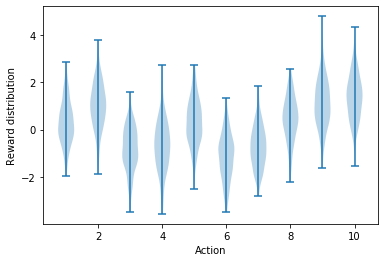

CPU times: user 220 ms, sys: 3.83 ms, total: 224 ms
Wall time: 516 ms


In [10]:
%%time
if __name__ == '__main__':
    figure_2_1()

### Conclusion
An example bandit problem from the 10-armed testbed. 
+ The true value $q_*(a)$ of each of the ten actions was selected according to a normal distribution with mean zero and unit variance,
+ Then the actual rewards were selected according to a mean $q_*(a)$ unit variance normal distribution, as suggested by these distributions.

# Ten-armed Testbed II
Average performance of $\epsilon-greedy$ action-value methods on the 10-armed testbed.
These data are averages over 2000 runs with different bandit problems. All methods used sample
averages as their action-value estimates.

<a href="#TOP">
        <span class="toc-item-num">&nbsp;&nbsp;</span>
        TOP
</a>

In [11]:
def figure_2_2(runs=2000, time=1000):
    epsilons = [0, 0.1, 0.01]
    bandits = [Bandit(epsilon=eps, sample_averages=True) for eps in epsilons]
    best_action_counts, rewards = simulate(runs, time, bandits)
    plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    for eps, rewards in zip(epsilons, rewards):
        plt.plot(rewards, label='epsilon = %.02f' % (eps))
    plt.xlabel('steps')
    plt.ylabel('average reward')
    plt.legend()

    plt.subplot(2, 1, 2)
    for eps, counts in zip(epsilons, best_action_counts):
        plt.plot(counts, label='epsilon = %.02f' % (eps))
    plt.xlabel('steps')
    plt.ylabel('% optimal action')
    plt.legend()
    plt.show()
    #plt.savefig('../images/figure_2_2.png')
    #plt.close()

100%|██████████| 2000/2000 [01:58<00:00, 16.83it/s]


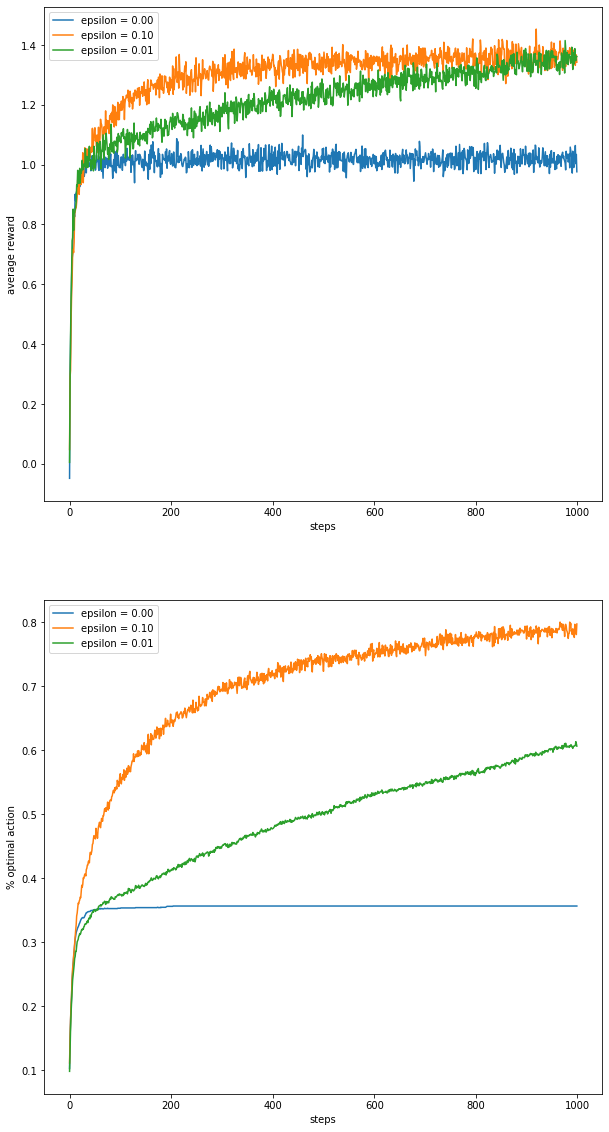

CPU times: user 6min 29s, sys: 1min 2s, total: 7min 31s
Wall time: 5min 49s


In [12]:
%%time
if __name__ == '__main__':
    figure_2_2()

### Conclusion
+ Comparing a greedy method with two $\epsilon-greedy$ methods: $\epsilon=0.01$ and $\epsilon=0.1$ on the 10-armed testbed.
+ All the methods formed their action-value estimates using the sample-average technique.
#### The greedy method
+ The upper graph shows:
    + The increase in expected reward with experience. 
    + Improved slightly faster than the other methods at the very beginning, but then leveled off at a lower level. 
    + It achieved a reward-per-step of only about 1, compared with the best possible of about 1.55 on this testbed. 
    + Performed significantly worse in the long run because it often got stuck performing suboptimal actions. 
+ The lower graph shows:
    + That the greedy method found the optimal action in only approximately one-third of the tasks.
    + In the other two-thirds, its initial samples of the optimal action were disappointing, and it never returned to it.
#### The $\epsilon-greedy$ method    
+ The $\epsilon-greedy$ methods eventually performed better because they continued to explore and to improve their chances of recognizing the optimal action.
+ The upper graph shows:
    + The $\epsilon= 0.1$  method explored more, and usually found the optimal action earlier, but it never selected that action more than 91% of the time.
    + The $\epsilon = 0.01$ method improved more slowly, but eventually would perform better than the $\epsilon= 0.1$ method on both performance measures shown in the figure. 

# Optimistic Initial Values
The effect of optimistic initial action-value estimates on the 10-armed testbed.
Both methods used a constant step-size parameter, $\alpha = 0.1$.

__The Action choice from the Bandit class will return a random choice of action while the current action value is less that the initial value. Once the best becames higher than the initial, it top exploring__

In [13]:
def figure_2_3(runs=2000, time=1000):
    bandits = []
    bandits.append(Bandit(epsilon=0, initial=5, step_size=0.1))
    bandits.append(Bandit(epsilon=0.1, initial=0, step_size=0.1))
    best_action_counts, _ = simulate(runs, time, bandits)

    plt.plot(best_action_counts[0], label='epsilon = 0, q = 5')
    plt.plot(best_action_counts[1], label='epsilon = 0.1, q = 0')
    plt.xlabel('Steps')
    plt.ylabel('% optimal action')
    plt.legend()
    plt.show()
    #plt.savefig('../images/figure_2_3.png')
    #plt.close()

100%|██████████| 2000/2000 [01:52<00:00, 17.74it/s]


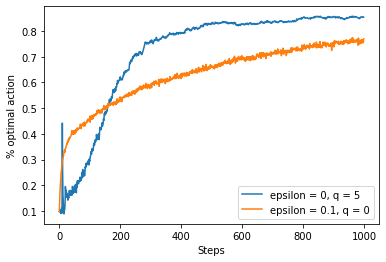

CPU times: user 4min 18s, sys: 40 s, total: 4min 58s
Wall time: 3min 52s


In [14]:
%%time
if __name__ == '__main__':
    figure_2_3()

### Conclusion
+ The plot shows the performance on the 10-armed bandit testbed of a greedy method using $Q_(a) = +5$, for all a. 
+ For comparison, also shown is an $\epsilon-greedy$ method with $Q_1(a) = 0$. 
+ Initially, the optimistic method performs worse because it explores more, but eventually it performs better because its exploration decreases with time. 
+ This technique for encouraging exploration is called **optimistic initial values**.
+ This simple trick that can be quite effective on stationary problems, but it is far from being a generally useful approach to encouraging exploration. 

# Upper-Confidence-Bound Action Selection
Let's run UCB on the 10-armed testbed. 
+ UCB often performs well, as shown here, but is more difficult than $\epsilon-greedy$ to extend beyond bandits to the more general reinforcement learning settings.
+ One difficulty is in __dealing with nonstationary problems__; methods more complex than would be needed. 
+ Another diculty is __dealing with large state spaces__, particularly when using function approximation as we have already explored. 
+ In these more advanced settings the idea of UCB action selection is usually not practical.

<a href="#TOP">
        <span class="toc-item-num">&nbsp;&nbsp;</span>
        TOP
</a>

In [15]:
def figure_2_4(runs=2000, time=1000):
    bandits = []
    bandits.append(Bandit(epsilon=0, UCB_param=2, sample_averages=True))
    bandits.append(Bandit(epsilon=0.1, sample_averages=True))
    _, average_rewards = simulate(runs, time, bandits)

    plt.plot(average_rewards[0], label='UCB c = 2')
    plt.plot(average_rewards[1], label='epsilon greedy epsilon = 0.1')
    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    plt.legend()
    plt.show()
    #plt.savefig('../images/figure_2_4.png')
    #plt.close()

100%|██████████| 2000/2000 [01:50<00:00, 18.03it/s]


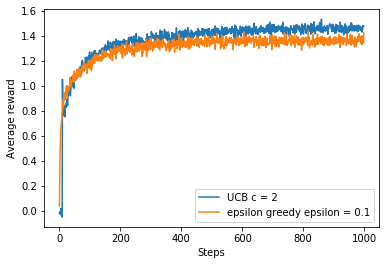

CPU times: user 4min 50s, sys: 40.6 s, total: 5min 31s
Wall time: 4min 25s


In [16]:
%%time
if __name__ == '__main__':
    figure_2_4()

### Conclusion
+ Average performance of UCB action selection on the 10-armed testbed. 
+ As shown,UCB generally performs better than $\epsilon-greedy$ action selection, except in the first k steps, when it selects randomly among the as-yet-untried actions. 

# Gradient Bandits
+ The plot shows results with the gradient bandit algorithm on a variant of the 10-
armed testbed in which the true expected rewards were selected according to a normal
distribution with a mean of +4 instead of zero (and with unit variance as before).
+ This shifting up of all the rewards has absolutely no effect on the gradient bandit algorithm
because of the reward baseline term, which instantaneously adapts to the new level. 
+ But if the baseline were omitted (that is, if $\overline R_t$ was taken to be constant zero), then performance would be significantly degraded, as shown in the figure.

<a href="#TOP">
        <span class="toc-item-num">&nbsp;&nbsp;</span>
        TOP
</a>

In [17]:
def figure_2_5(runs=2000, time=1000):
    bandits = []
    bandits.append(Bandit(gradient=True, step_size=0.1, gradient_baseline=True, true_reward=4))
    bandits.append(Bandit(gradient=True, step_size=0.1, gradient_baseline=False, true_reward=4))
    bandits.append(Bandit(gradient=True, step_size=0.4, gradient_baseline=True, true_reward=4))
    bandits.append(Bandit(gradient=True, step_size=0.4, gradient_baseline=False, true_reward=4))
    best_action_counts, _ = simulate(runs, time, bandits)
    labels = ['alpha = 0.1, with baseline',
              'alpha = 0.1, without baseline',
              'alpha = 0.4, with baseline',
              'alpha = 0.4, without baseline']

    for i in range(len(bandits)):
        plt.plot(best_action_counts[i], label=labels[i])
    plt.xlabel('Steps')
    plt.ylabel('% Optimal action')
    plt.legend()
    plt.show()
    #plt.savefig('../images/figure_2_5.png')
    #plt.close()

100%|██████████| 2000/2000 [02:54<00:00, 11.47it/s]


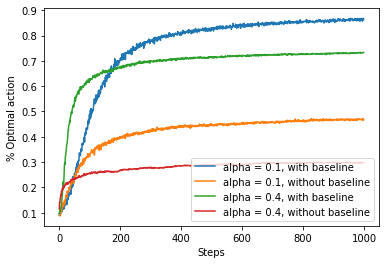

CPU times: user 12min 31s, sys: 1min 23s, total: 13min 55s
Wall time: 11min 33s


In [18]:
%%time
if __name__ == '__main__':
    figure_2_5()

# Parameter Study Graphs
The plot shows a parameter study of the various bandit algorithms presented in this lecture.

Each point is the average reward obtained over 1000 steps with a particular algorithm at a
particular setting of its parameter.

<a href="#TOP">
        <span class="toc-item-num">&nbsp;&nbsp;</span>
        TOP
</a>

In [19]:
def figure_2_6(runs=2000, time=1000):
    labels = ['epsilon-greedy', 'gradient bandit',
              'UCB', 'optimistic initialization']
    generators = [lambda epsilon: Bandit(epsilon=epsilon, sample_averages=True),
                  lambda alpha: Bandit(gradient=True, step_size=alpha, gradient_baseline=True),
                  lambda coef: Bandit(epsilon=0, UCB_param=coef, sample_averages=True),
                  lambda initial: Bandit(epsilon=0, initial=initial, step_size=0.1)]
    parameters = [np.arange(-7, -1, dtype=np.float),
                  np.arange(-5, 2, dtype=np.float),
                  np.arange(-4, 3, dtype=np.float),
                  np.arange(-2, 3, dtype=np.float)]

    bandits = []
    for generator, parameter in zip(generators, parameters):
        for param in parameter:
            bandits.append(generator(pow(2, param)))

    _, average_rewards = simulate(runs, time, bandits)
    rewards = np.mean(average_rewards, axis=1)

    i = 0
    for label, parameter in zip(labels, parameters):
        l = len(parameter)
        plt.plot(parameter, rewards[i:i+l], label=label)
        i += l
    plt.xlabel('Parameter(2^x)')
    plt.ylabel('Average reward')
    plt.legend()
    plt.show()
    #plt.savefig('../images/figure_2_6.png')
    #plt.close()

In [ ]:
%%time
if __name__ == '__main__':
    figure_2_6()

 11%|█▏        | 228/2000 [00:13<01:44, 16.97it/s]

### Conclusion
+ Each as a function of its own parameter shown on a single scale on the x-axis. 
+ This kind of graph is called a **parameter study**. 
+ Note that the parameter values are varied by factors of two and presented on a log scale. 
+ In assessing a method, we should attend not just to how well it does at its best parameter setting, but also to how sensitive it is to its parameter value. 
+ Overall, on this problem, UCB seems to perform best.